In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

2024-10-04 14:46:30.411429: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 14:46:30.419454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 14:46:30.427752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 14:46:30.430606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 14:46:30.437254: I tensorflow/core/platform/cpu_feature_guar

In [22]:

# Load the data
df = pd.read_csv('/home/paulj/niru/INFO6105_DataSci/Assignment2Niruthiha_Selvnayagam_002413183/BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data cleaning and pre-processing


The columns being dropped are: 
'CLIENTNUM' 
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' 
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

axis=1 specifies that we're dropping columns.
Now, let's explain why these columns are being dropped:

'CLIENTNUM': This is a unique identifier for each customer. It doesn't provide useful predictive information for the model.
The two 'Naive_Bayes_Classifier...' columns:
These appear to be pre-computed probabilities or classifications from a Naive Bayes model.
They're dropped because: a. They're derived features, not raw data. Including them could bias your new model or lead to data leakage, as they contain information about the target variable (Attrition_Flag). c. Your ANN should learn its own features and patterns from the raw data.

This preprocessing step is crucial for maintaining the integrity of your analysis and ensuring that your ANN model's predictions are based on genuine patterns in the customer data, rather than artifacts from previous analyses or irrelevant identifiers.

In [23]:
# Drop unnecessary columns
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [24]:

# Encode target variable
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])
# Note: 'Existing Customer' will be 0, 'Attrited Customer' will be 1
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [25]:
# One-hot encode categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

df_encoded


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,True,False,False,False,True,False,False,False
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,False,False,True,False,True,False,False,False
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,True,False,False,True,False,False,False
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,False,True,False,True,False,False,False
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,False,True,False,False,False,False,True,False,False,False
10123,0,41,2,25,4,2,3,4277.0,2186,2091.0,...,False,True,False,False,False,False,True,False,False,False
10124,0,44,1,36,5,3,4,5409.0,0,5409.0,...,False,False,False,False,True,False,True,False,False,False
10125,0,30,2,36,4,3,3,5281.0,0,5281.0,...,False,True,False,False,False,False,True,False,False,False


In [26]:
# Separate features and target
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


80% of the customer data and then evaluate its performance on the remaining 20%, giving a good estimate of how well the model might perform in predicting churn for new customer

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler is used to standardize features by removing the mean and scaling to unit variance.It ensures all features are on a similar scale, typically with a mean of 0 and a standard deviation of 1.
This is crucial for many machine learning algorithms, especially neural networks, which are sensitive to the scale of input features. This scaling ensures that features like 'Credit_Limit' (which might have large values) don't overshadow features like 'Dependent_count' (which likely has smaller values) in the neural network's learning process.
It allows the ANN to treat all features equally initially, letting the model learn the true importance of each feature without bias from their original scales.

In [10]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/paulj/niru/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1728067675.486563 1681037 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-04 14:47:55.512106: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


Decreasing Layer Sizes: 64 -> 32 -> 16 -> 1
This structure allows the network to progressively refine and abstract features.

ReLU Activation:
Used in hidden layers for non-linearity
Helps mitigate the vanishing gradient problem

Dropout Layers:
Aid in preventing overfitting
Improve generalization

Sigmoid in Output Layer:
Appropriate for binary classification 
Outputs a probability that can be interpreted as the likelihood of churn

No Explicit Bias Term:
Keras includes bias by default in Dense layers unless specified otherwise

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Adam is a smart learning method that adjusts itself as it goes.
0.001 is the learning speed - not too fast, not too slow.
Binary crossentropy is great for yes/no decisions like "will they churn?"
Accuracy gives us a simple way to see how well we're doing.

- next, feeding the model with the training data.
- X_train_scaled is the customer info (like age, credit limit, etc.).
- y_train is whether each customer churned or not.
- setting aside 20% of our training data as a mini-test set.
- epoch = 50 We're telling the model to go through the entire dataset 50 times.
- batch_size = 32 We're processing 32 customers at a time.
- verbose = 1 This just means "show me the progress as you train."
- history: We're saving all the training info so we can look at it later.




In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8329 - loss: 0.4448 - val_accuracy: 0.8927 - val_loss: 0.2862
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8812 - loss: 0.2986 - val_accuracy: 0.9007 - val_loss: 0.2508
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8905 - loss: 0.2722 - val_accuracy: 0.9081 - val_loss: 0.2355
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8908 - loss: 0.2530 - val_accuracy: 0.9136 - val_loss: 0.2241
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8971 - loss: 0.2422 - val_accuracy: 0.9223 - val_loss: 0.2160
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9074 - loss: 0.2270 - val_accuracy: 0.9223 - val_loss: 0.2073
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2295 - val_accuracy: 0.9247 - val_loss: 0.2033
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.2045 - val_

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9284


In [14]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


In [15]:
# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Existing Customer', 'Attrited Customer']))


                   precision    recall  f1-score   support

Existing Customer       0.81      0.73      0.77       327
Attrited Customer       0.95      0.97      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.88      0.85      0.86      2026
     weighted avg       0.93      0.93      0.93      2026



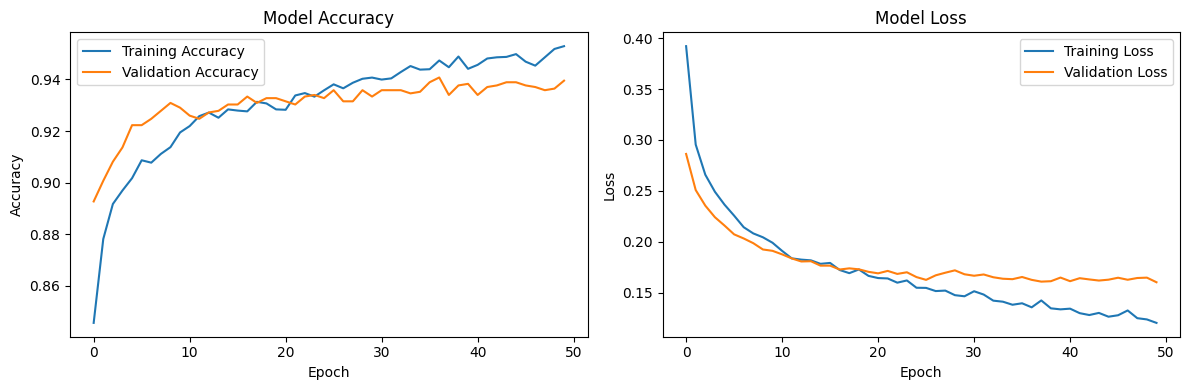

In [17]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

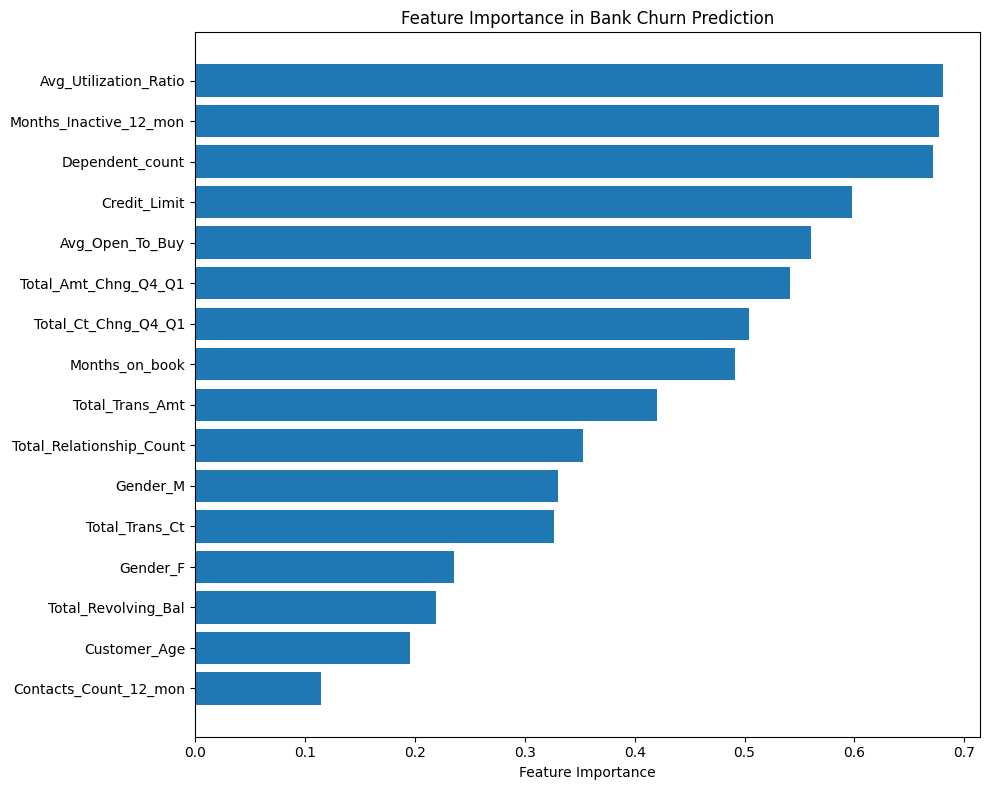

In [18]:
# Feature importance
feature_importance = np.abs(model.layers[-1].get_weights()[0]).flatten()
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Bank Churn Prediction')
plt.tight_layout()
plt.show()

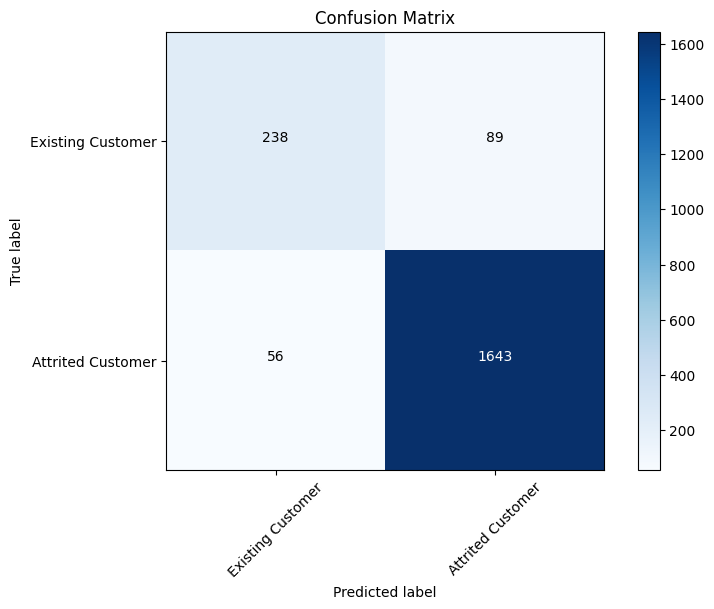

In [19]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Existing Customer', 'Attrited Customer'], rotation=45)
plt.yticks(tick_marks, ['Existing Customer', 'Attrited Customer'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

The ANN model exhibited strong performance with a test accuracy of 93%. The high F1-scores for both classes, especially for Attrited Customers (0.96), indicate that the model is effective at predicting churn despite the class imbalance. The use of dropout layers and appropriate activation functions (ReLU in hidden layers, Sigmoid in the output layer) proved effective for this binary classification task.

The feature importance analysis reveals that customer behavior patterns, such as credit utilization and inactivity periods, are crucial in predicting churn. This information can be valuable for developing targeted retention strategies.